In [2]:
import sys 
import pandas as pd 
import numpy as np
import sklearn 
import tensorflow.keras as keras 

print("Python: {}".format(sys.version))
print("Pandas: {}".format(pd.__version__))
print("Numpy: {}".format(np.__version__))
print("Sklearn: {}".format(sklearn.__version__))
print("Keras: {}".format(keras.__version__))

Python: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
Pandas: 1.2.4
Numpy: 1.19.5
Sklearn: 0.24.2
Keras: 2.5.0


In [3]:
names = {'Pregnancies': 'n_pregnant', 'Glucose': 'glucose_concentration', 'BloodPressure': 'blood_pressuer (mm Hg)', 
         'SkinThickness': 'skin_thickness (mm)', 'Insulin': 'serum_insulin (mu U/ml)', 
         'DiabetesPedigreeFunction': 'pedigree_function', 'Age': 'age', 'Outcome': 'class'}
df = pd.read_csv('./../diabetes.csv')
df.rename(columns = names, inplace = True)
df.head()

,n_pregnant,glucose_concentration,blood_pressuer (mm Hg),skin_thickness (mm),serum_insulin (mu U/ml),BMI,pedigree_function,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Describe the data we have 
df.describe()

,n_pregnant,glucose_concentration,blood_pressuer (mm Hg),skin_thickness (mm),serum_insulin (mu U/ml),BMI,pedigree_function,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# We see columns such as glucose_concentration, BMI, etc. have 0 as min value. It might be because of missing datas
# Checking how much data is missing 
columns = ['glucose_concentration', 'blood_pressuer (mm Hg)', 'skin_thickness (mm)','serum_insulin (mu U/ml)']
for col in columns:
    df[col].replace(0, np.NaN, inplace=True)

df.describe() 

,n_pregnant,glucose_concentration,blood_pressuer (mm Hg),skin_thickness (mm),serum_insulin (mu U/ml),BMI,pedigree_function,age,class
count,768.000000,763.000000,733.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Drop rows with missing datas 
df.dropna(inplace=True)

df.describe()

,n_pregnant,glucose_concentration,blood_pressuer (mm Hg),skin_thickness (mm),serum_insulin (mu U/ml),BMI,pedigree_function,age,class
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,3.292621,122.615776,70.646310,29.129771,155.885496,33.002036,0.526120,30.839695,0.330789
std,3.211645,30.822276,12.484668,10.507575,118.738199,7.214395,0.350386,10.199903,0.471097
min,0.000000,56.000000,24.000000,7.000000,14.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,77.000000,28.400000,0.270000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.452000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Convert data to numpy array 
data = df.values
print(data.shape)

(393, 9)


In [8]:
# Split to X and Y sets 
X = data[:,0:-1]
Y = data[:,-1].astype(int)        # We don't want our classes to be of float type 

In [9]:
# Checking if split has been properly done 
print(X.shape)
print(Y.shape)
print(X[:5,:])

(393, 8)
(393,)
[[1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [1.000e+00 1.890e+02 6.000e+01 2.300e+01 8.460e+02 3.010e+01 3.980e-01
  5.900e+01]]


In [10]:
# Looking at datas we observe thaat they are in a very different scales, 
# example n_pregnant (from 1 to 17) and serum_insulin (from 14 to 846). So we will normalize the data 
# Normalizing using sklearn StandardScaler  ( converts to 0 mean, unit variance)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)         
# Creates a tranformation that when applied to any data will transform it into 0 mean unit variance distribution of X 

X_standardized = scaler.transform(X)       
# Applying tranformation on X so that it is standardized. 
# We will have to apply the same transformation for any other data we will test our model with. 

df_Standardized = pd.DataFrame(X_standardized)

df_Standardized.describe()    
# To check if all values are in similar range or not also check for 0 mean and 1 standard deviation. 

,0,1,2,3,4,5,6,7
count,3.930000e+02,3.930000e+02,3.930000e+02,3.930000e+02,3.930000e+02,3.930000e+02,3.930000e+02,3.930000e+02
mean,9.943982e-17,-1.242998e-16,-1.107398e-16,-1.514197e-16,6.327989e-17,1.536797e-16,1.129998e-17,-7.683986e-17
std,1.001275e+00,1.001275e+00,1.001275e+00,1.001275e+00,1.001275e+00,1.001275e+00,1.001275e+00,1.001275e+00
min,-1.026520e+00,-2.164042e+00,-3.741050e+00,-2.108762e+00,-1.196467e+00,-4.580301e+00,-1.260558e+00,-9.659148e-01
25%,-7.147562e-01,-7.671685e-01,-6.934371e-01,-7.746920e-01,-6.652118e-01,-6.387094e-01,-7.318959e-01,-7.695846e-01
50%,-4.029924e-01,-1.174600e-01,-5.183432e-02,-1.236597e-02,-2.604458e-01,2.747517e-02,-2.118066e-01,-3.769241e-01
75%,5.322990e-01,6.621901e-01,5.897685e-01,7.499600e-01,2.876748e-01,5.687501e-01,4.597372e-01,5.065620e-01
max,4.273465e+00,2.448888e+00,3.156180e+00,3.227519e+00,5.819477e+00,4.732404e+00,5.412016e+00,4.923993e+00


In [11]:
# Import necessary packages and layers 
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 
from tensorflow.keras.optimizers import Adam

In [12]:
# Defining the model 

def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile the model
    adam = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
    
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# Create a model
model = KerasClassifier(build_fn=create_model, verbose = 0)

# Grid Search over batch_size and epochs 
batch_size = [10, 20, 40]
epochs = [10, 50, 100]

# Make a dictionary for grid search parameters as GridSearchCV takes dictionary as inputs 
param_grid = dict(batch_size=batch_size, epochs=epochs)

# Build and fit over grid parameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(n_splits=3), verbose=10)
grid_results = grid.fit(X_standardized, Y)

# Summarize the result 
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print("Mean: {0}, Standard Deviation: {1}, using {2}".format(mean, std, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3; 1/9] START batch_size=10, epochs=10....................................
[CV 1/3; 1/9] END .....batch_size=10, epochs=10;, score=0.763 total time=   2.3s
[CV 2/3; 1/9] START batch_size=10, epochs=10....................................
[CV 2/3; 1/9] END .....batch_size=10, epochs=10;, score=0.763 total time=   1.2s
[CV 3/3; 1/9] START batch_size=10, epochs=10....................................
[CV 3/3; 1/9] END .....batch_size=10, epochs=10;, score=0.817 total time=   1.4s
[CV 1/3; 2/9] START batch_size=10, epochs=50....................................
[CV 1/3; 2/9] END .....batch_size=10, epochs=50;, score=0.733 total time=   3.3s
[CV 2/3; 2/9] START batch_size=10, epochs=50....................................
[CV 2/3; 2/9] END .....batch_size=10, epochs=50;, score=0.763 total time=   3.0s
[CV 3/3; 2/9] START batch_size=10, epochs=50....................................
[CV 3/3; 2/9] END .....batch_size=10, epochs=50;,

In [14]:
# Here we will grid search over learning_rate and dropout 
from tensorflow.keras.layers import Dropout

# Define our model
def create_model(learning_rate, dropout):
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation = 'relu'))
    model.add(Dropout(dropout))
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation = 'relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile the model
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Create a model
model = KerasClassifier(build_fn=create_model, batch_size=10, epochs=100, verbose = 0)

# Grid Search over learning_rate and dropout 
learning_rate = [0.001, 0.01, 0.1]
dropout = [0, 0.05, 0.1]

# Make a dictionary for grid search parameters as GridSearchCV takes dictionary as inputs 
param_grid = dict(learning_rate=learning_rate, dropout=dropout)

# Build and fit over grid parameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(n_splits=3), verbose=10)
grid_results = grid.fit(X_standardized, Y)

# Summarize the result 
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print("Mean: {0}, Standard Deviation: {1}, using {2}".format(mean, std, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3; 1/9] START dropout=0, learning_rate=0.001..............................
[CV 1/3; 1/9] END dropout=0, learning_rate=0.001;, score=0.756 total time=   5.7s
[CV 2/3; 1/9] START dropout=0, learning_rate=0.001..............................
[CV 2/3; 1/9] END dropout=0, learning_rate=0.001;, score=0.756 total time=   6.0s
[CV 3/3; 1/9] START dropout=0, learning_rate=0.001..............................
[CV 3/3; 1/9] END dropout=0, learning_rate=0.001;, score=0.855 total time=   6.1s
[CV 1/3; 2/9] START dropout=0, learning_rate=0.01...............................
[CV 1/3; 2/9] END dropout=0, learning_rate=0.01;, score=0.748 total time=   7.5s
[CV 2/3; 2/9] START dropout=0, learning_rate=0.01...............................
[CV 2/3; 2/9] END dropout=0, learning_rate=0.01;, score=0.718 total time=   5.4s
[CV 3/3; 2/9] START dropout=0, learning_rate=0.01...............................
[CV 3/3; 2/9] END dropout=0, learning_rate=0.0

In [21]:
# Here we will grid search over activtion and kernel_initializer 

# Define our model
def create_model(activation, init):
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer=init, activation = activation))
    model.add(Dense(4, input_dim = 8, kernel_initializer=init, activation = activation))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile the model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Create a model
model = KerasClassifier(build_fn=create_model, batch_size=10, epochs=100, verbose = 0)

# Grid Search over activation and kernel_initializer 
activation = ['softmax', 'linear', 'relu', 'tanh']
init = ['uniform', 'normal', 'zero']

# Make a dictionary for grid search parameters as GridSearchCV takes dictionary as inputs 
param_grid = dict(activation=activation, init=init)

# Build and fit over grid parameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(n_splits=3), verbose=10)
grid_results = grid.fit(X_standardized, Y)

# Summarize the result 
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print("Mean: {0}, Standard Deviation: {1}, using {2}".format(mean, std, param))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START activation=softmax, init=uniform...........................
[CV 1/3; 1/12] END activation=softmax, init=uniform;, score=0.718 total time=   5.9s
[CV 2/3; 1/12] START activation=softmax, init=uniform...........................
[CV 2/3; 1/12] END activation=softmax, init=uniform;, score=0.771 total time=   5.5s
[CV 3/3; 1/12] START activation=softmax, init=uniform...........................
[CV 3/3; 1/12] END activation=softmax, init=uniform;, score=0.809 total time=   5.0s
[CV 1/3; 2/12] START activation=softmax, init=normal............................
[CV 1/3; 2/12] END activation=softmax, init=normal;, score=0.725 total time=   5.9s
[CV 2/3; 2/12] START activation=softmax, init=normal............................
[CV 2/3; 2/12] END activation=softmax, init=normal;, score=0.756 total time=   5.2s
[CV 3/3; 2/12] START activation=softmax, init=normal............................
[CV 3/3; 2/12] END activation=

In [22]:
# NOTE that Activation: 'relu' and init: 'normal' even acheives the best accuracy, so we will use it. 
# Here we will grid search over no. of hidden units

# Define our model
def create_model(neuron1, neuron2):
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 8, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile the model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Create a model
model = KerasClassifier(build_fn=create_model, batch_size=10, epochs=100, verbose = 0)

# Grid Search over no. of hidden units
neuron1 = [4, 8, 16]
neuron2 = [2, 4, 8] 

# Make a dictionary for grid search parameters as GridSearchCV takes dictionary as inputs 
param_grid = dict(neuron1=neuron1, neuron2=neuron2)

# Build and fit over grid parameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(n_splits=3), refit=True, verbose=10)
grid_results = grid.fit(X_standardized, Y)

# Summarize the result 
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print("Mean: {0}, Standard Deviation: {1}, using {2}".format(mean, std, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/3; 1/9] END .........neuron1=4, neuron2=2;, score=0.771 total time=   5.3s
[CV 2/3; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/3; 1/9] END .........neuron1=4, neuron2=2;, score=0.771 total time=   5.7s
[CV 3/3; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/3; 1/9] END .........neuron1=4, neuron2=2;, score=0.832 total time=   5.4s
[CV 1/3; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/3; 2/9] END .........neuron1=4, neuron2=4;, score=0.748 total time=   5.6s
[CV 2/3; 2/9] START neuron1=4, neuron2=4........................................
[CV 2/3; 2/9] END .........neuron1=4, neuron2=4;, score=0.779 total time=   5.5s
[CV 3/3; 2/9] START neuron1=4, neuron2=4........................................
[CV 3/3; 2/9] END .........neuron1=4, neuron2=4;,

In [23]:
# Generating predictions on optimal hyperparameters 
# ( We can do this as we set refit=True in the grid above, so grid is retraained with optaimal parameters)
y_pred = grid.predict(X_standardized)

print(y_pred.shape)
print(y_pred[:5])

C:\Users\91773\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(393, 1)
[[0]
 [1]
 [0]
 [1]
 [1]]


In [24]:
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))

0.816793893129771
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       263
           1       0.73      0.72      0.72       130

    accuracy                           0.82       393
   macro avg       0.79      0.79      0.79       393
weighted avg       0.82      0.82      0.82       393



In [25]:
# Predict on example data 
example = df.iloc[1] 
print(example)

n_pregnant                   0.000
glucose_concentration      137.000
blood_pressuer (mm Hg)      40.000
skin_thickness (mm)         35.000
serum_insulin (mu U/ml)    168.000
BMI                         43.100
pedigree_function            2.288
age                         33.000
class                        1.000
Name: 4, dtype: float64


In [26]:
# Predict using our deep neural network model 
prediction = grid.predict(X_standardized[1].reshape(1,-1))
print(prediction)

[[1]]


C:\Users\91773\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Saving model in the file 

In [29]:
from tensorflow.keras.layers import Dropout

# Creating the model with all optimal hyperparameters 
def create_model():
    model = Sequential()
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(4, input_dim = 4, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile the model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# Create the model 
model = KerasClassifier(build_fn=create_model, batch_size=10,epochs=100, verbose = 0)
history = model.fit(X_standardized, Y)

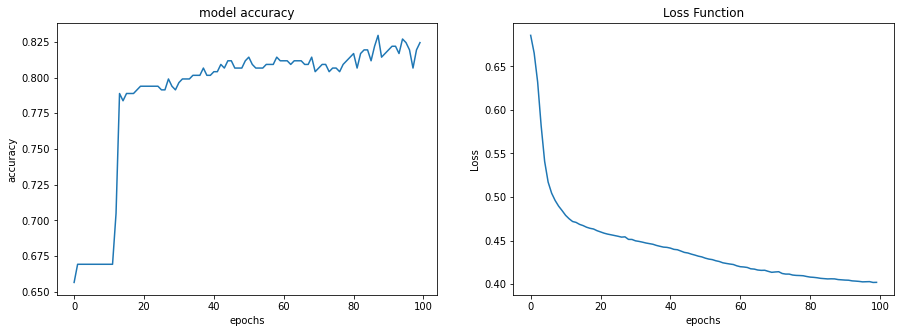

In [43]:
import matplotlib.pyplot as plt

loss = history.history['loss']
acc = history.history['accuracy']

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(acc)
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(1,2,2)
plt.plot(loss)
plt.title('Loss Function')
plt.xlabel('epochs')
plt.ylabel('Loss')

plt.show()

In [44]:
# Checking if model is correctly made 
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_standardized)

print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))

C:\Users\91773\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.8244274809160306
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       263
           1       0.75      0.70      0.73       130

    accuracy                           0.82       393
   macro avg       0.80      0.79      0.80       393
weighted avg       0.82      0.82      0.82       393



In [45]:
# Saving the model, without making the pipeline 
import pickle 
model.model.save('neural_network_model.h5')   
# We have saved the model not keras Classifier, the model will gave us values in range [0,1] and not discrete values  

pickle.dump(scaler, open('Scaler.pkl', 'wb'))

In [46]:
# Loading the model and making a pipeline 
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import load_model 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

scale = pickle.load(open('Scaler.pkl', 'rb'))
loaded_model = load_model('neural_network_model.h5')

pipe = Pipeline([('scaler', scale), ('Neural-network', loaded_model )])

In [53]:
# Verifying that pipeline works accurately 

# Use some random training data for checking 
ex = df.iloc[7].values[:-1]
ex = ex.reshape(1,-1)
print(df.iloc[7]['class'])

# Predict using pipeline 
prediction = pipe.predict(ex)
prediction = prediction.item() 
print(round(prediction))

0.0
0
